# 20220512 Initial Analysis

In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
from astropy.table import Table, Column
from astropy.io import fits
import numpy as np
from importlib import reload
from imaka.analysis import plot_stats
from imaka.analysis import plot_redu
from imaka.reduce import util
from astropy.stats import sigma_clipped_stats

import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import seaborn as sns

import imaka.analysis.moffat as moffat
## Edit Me
from imaka.reduce.nights import reduce_2022_05_12 as redu
night = '20220512'
fld = 'Fld2'

root_dir = redu.root_dir
stats_dir = root_dir + "reduce/stats/"
plots_dir = root_dir + "reduce/plots/"
stack_dir = root_dir + "reduce/stacks/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
## Had an issue with stacking, the gfol
for key in list(redu.dict_images.keys()):
    for i in range(len(redu.dict_images[key])):
        img_num = redu.dict_images[key]
        suf = redu.dict_suffix[key]
        test_img_base = 'sta{img:03d}{suf:s}_scan'.format(img=img_num[i], suf=suf)
        
        stars = Table.read(root_dir + f'reduce/{fld}/' + test_img_base + '_clean_stars_stats_mdp.fits')
        print(f"key: {key} image {img_num[i]} stars: {len(stars)}")  

key: open image 124 stars: 765
key: open image 126 stars: 668
key: open image 128 stars: 838
key: open image 130 stars: 499
key: open image 132 stars: 933
key: open image 134 stars: 839
key: open image 136 stars: 719
key: open image 138 stars: 802
key: open image 140 stars: 695
key: open image 147 stars: 922
key: open image 149 stars: 942
key: open image 151 stars: 976
key: open image 153 stars: 970
key: open image 155 stars: 1156
key: open image 157 stars: 1072
key: open image 159 stars: 1132
key: LS image 123 stars: 1144
key: LS image 125 stars: 706
key: LS image 127 stars: 737
key: LS image 129 stars: 804
key: LS image 131 stars: 936
key: LS image 133 stars: 1156
key: LS image 135 stars: 969
key: LS image 137 stars: 1111
key: LS image 139 stars: 1071
key: LS image 146 stars: 1394
key: LS image 148 stars: 1050
key: LS image 150 stars: 1343
key: LS image 152 stars: 1267
key: LS image 154 stars: 1681
key: LS image 156 stars: 1393
key: LS image 158 stars: 1363


# 0. Plot: Single Image and starlists

In [7]:
# pick a file based on key
key = 'LS'
i = 10
#####
img_num = redu.dict_images[key]
suf = redu.dict_suffix[key]
test_img_base = 'sta{img:03d}{suf:s}_scan'.format(img=img_num[i], suf=suf)

50% EE radius = 0.700"


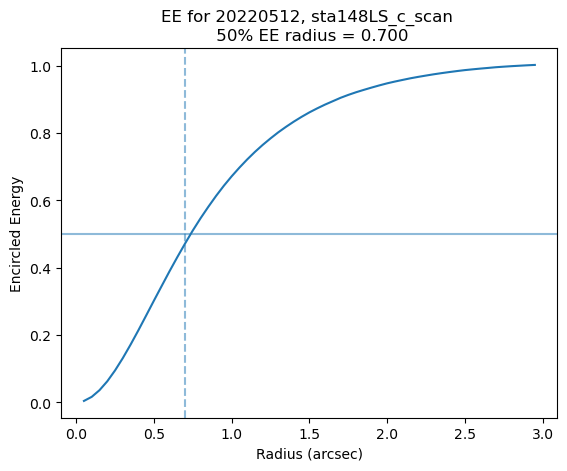

In [8]:
plot_redu.plot_ee_50(test_img_base, root_dir, fld, night)

/g/lu/data/imaka/onaga/20220512/sta/reduce/Fld2//sta148LS_c_scan_clean.fits


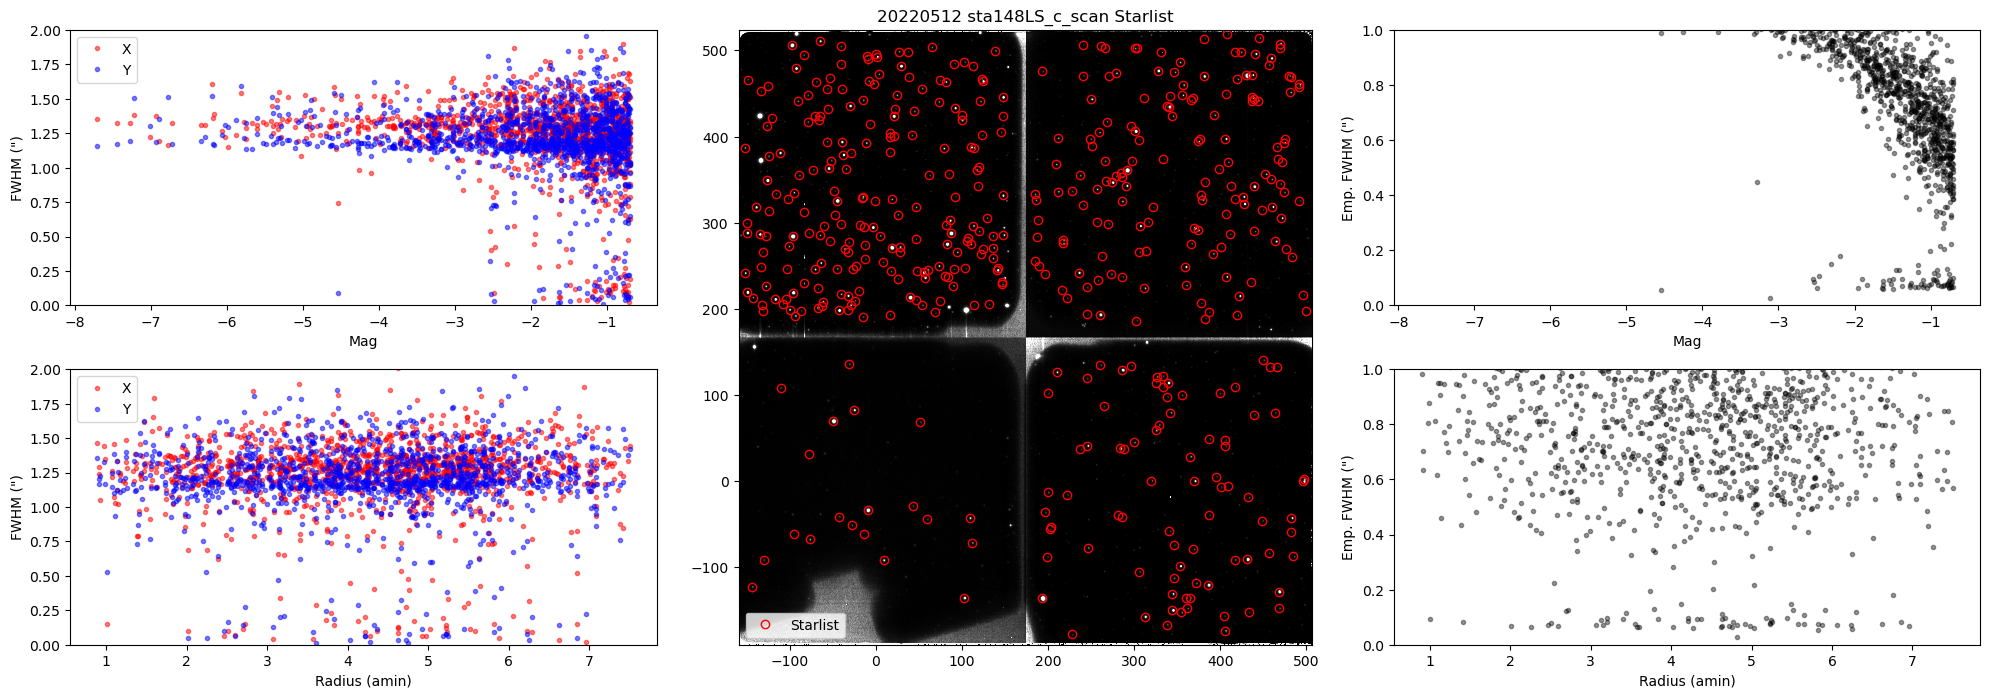

x: fwhm_x_avg = 1.28" fwhm_x_med = 1.29" fwhm_x_std = 0.16"
x: fwhm_x_avg = 1.28" fwhm_x_med = 1.29" fwhm_x_std = 0.16"


In [9]:
plot_redu.plot_starlist_stats(test_img_base, root_dir, fld, night)

In [9]:
from astropy import table
starlist = root_dir + 'reduce/Fld2/' + test_img_base + '_clean_stars_stats_mdp.fits'
stars = table.Table.read(starlist)

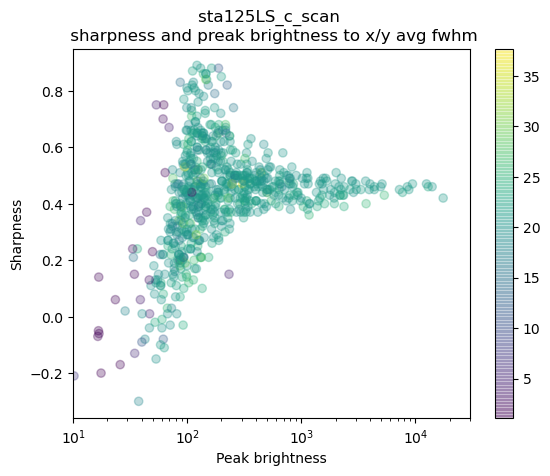

In [10]:
# num pix vs fwhm
plt.scatter(stars['peak'], stars['sharpness'], c=np.average([stars['x_fwhm'], stars['y_fwhm']], axis=0), alpha=0.3)
plt.xlim(10, 30000)
plt.xscale('log')
plt.xlabel("Peak brightness")
plt.ylabel("Sharpness")
plt.title(test_img_base+ " \n sharpness and preak brightness to x/y avg fwhm")
plt.colorbar()

# 1. Stat Plots
Various measures of starlists. These mostly depend on each individual sarlist having stats calculated.

## 1.1. Plot: Moffat profile summary

Beta vs. minor alpha and Beta vs. phi

In [12]:
stats = Table.read(root_dir + 'reduce/stats/stats_LS.fits')
print(stats.colnames)

['Image', 'starlist', 'FILTER', 'F_ORD', 'BINFAC', 'DATE_UTC', 'TIME_UTC', 'DATE_HST', 'TIME_HST', 'FWHM', 'FWHM_std', 'EE25', 'EE50', 'EE80', 'NEA', 'NEA2', 'xFWHM', 'yFWHM', 'theta', 'emp_fwhm', 'emp_fwhm_std', 'quadrant', 'Index', 'N Stars', 'N Sky', 'N Sky std', 'Amplitude', 'Amplitude std', 'Phi', 'Phi std', 'Beta', 'Beta std', 'Minor Alpha', 'Minor Alpha std', 'Major Alpha', 'Major Alpha std']


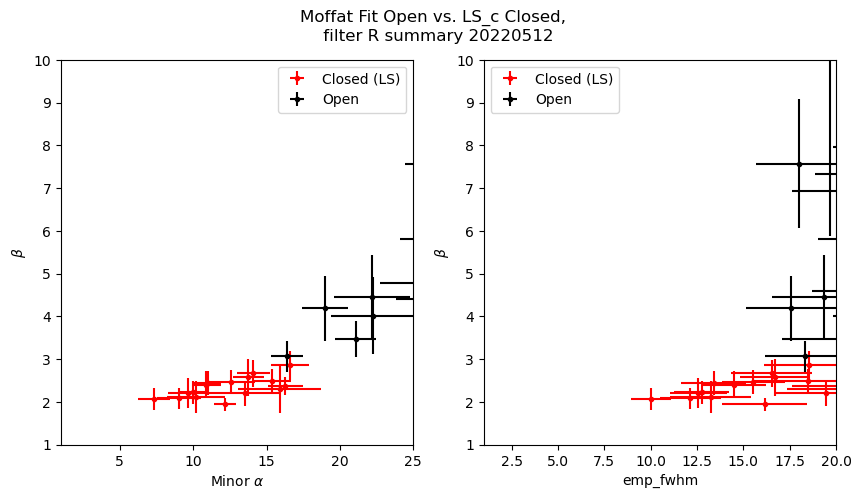

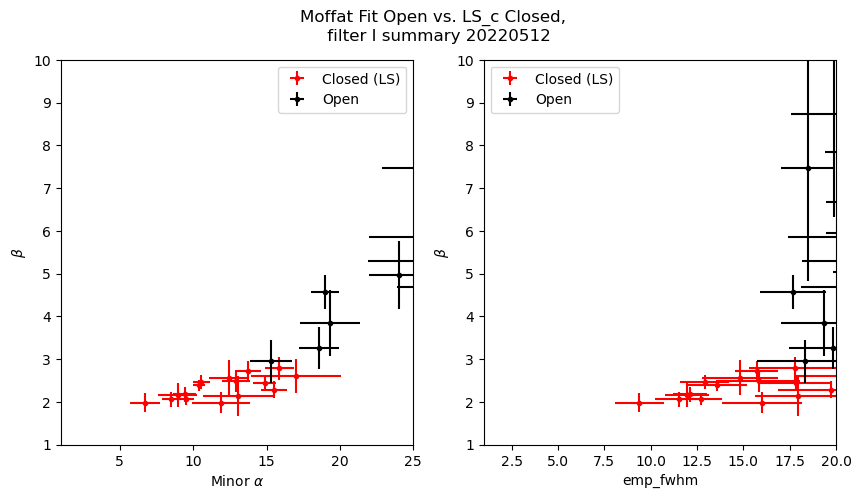

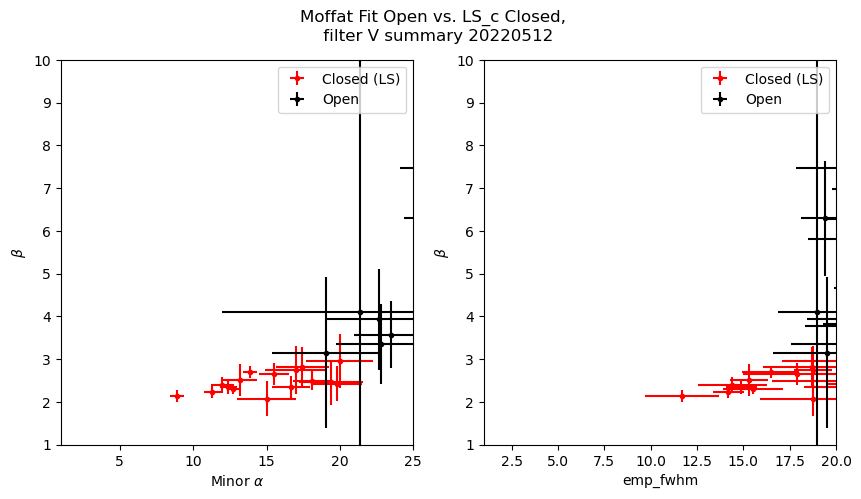

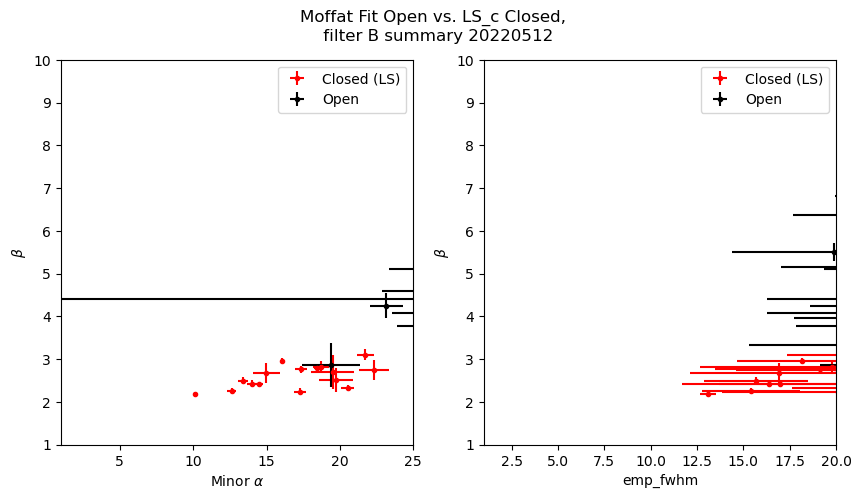

In [120]:
c_key = "LS_c"
plot_redu.plot_moffat_fit_4F("R", root_dir, c_key, fld, night)
plot_redu.plot_moffat_fit_4F("I", root_dir, c_key, fld, night)
plot_redu.plot_moffat_fit_4F("V", root_dir, c_key, fld, night)
plot_redu.plot_moffat_fit_4F("B", root_dir, c_key, fld, night)

### Beta vs. Mag on Stacks

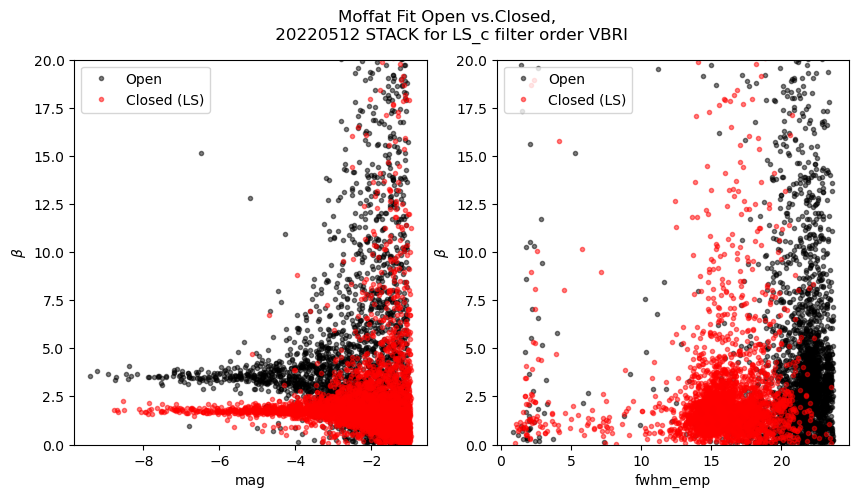

In [121]:
plot_redu.plot_beta_mag_4F_stacks(redu, filt_key = "VBRI")

## Beta vs. FWHM for wavelength

### $Beta$ vs FWHM, Individual images
This looks at the combined individual images and standard deviation on them. 

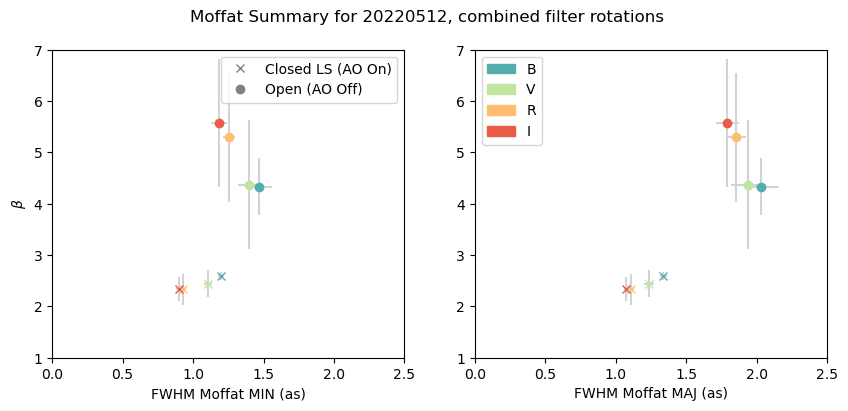

In [14]:
plot_redu.plot_fwhm_beta_4F_frames(redu, c_keys = ["LS_c", "_o"], xlim=[0,2.5])

### $Beta$ vs FWHM, Stacked images
This looks at the stackes images and standard deviation calculated in the moffat fitting. 

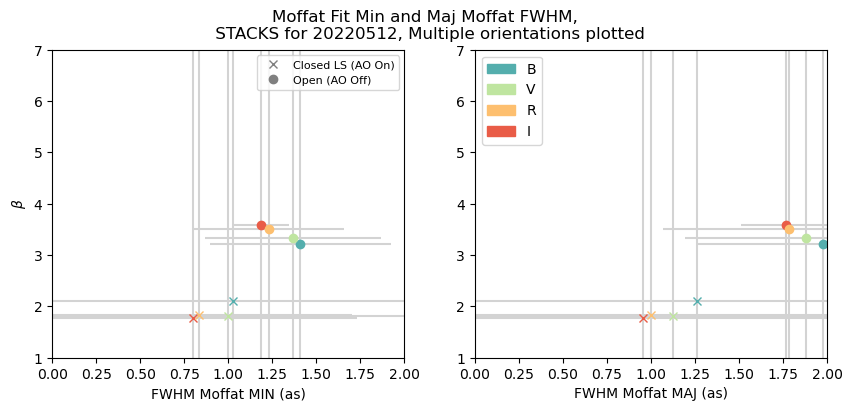

In [15]:
plot_redu.plot_fwhm_beta_4F_stack_sum(redu, c_keys = ["LS_c", "_o"], xlim=[0,2])

### Jitter: Difference between MIN and MAJ
Here we look at the impact of jitter by comparing major and minor axes

['VBRI']


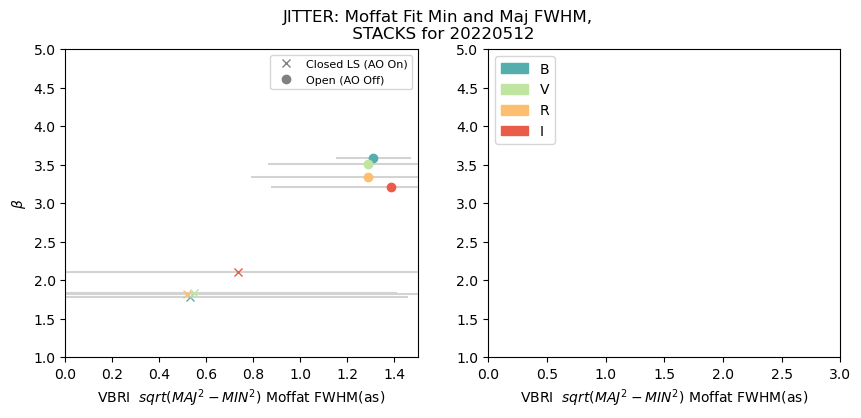

In [79]:
plot_redu.plot_jitter_4F_stack_sum(redu, c_keys = ["LS_c", "_o"])

### FA vs. FWHM
Here we want to know how the seperation from center affects FWHM from the stacked image starlists. 

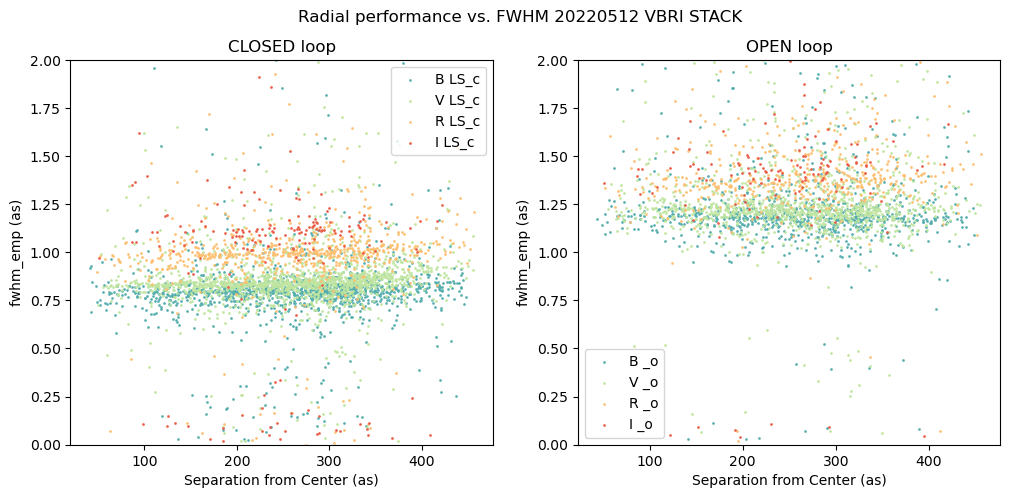

In [81]:
plot_redu.plot_fwhm_sep_4F_stacks(redu, c_key = 'LS_c', odr ='VBRI')

## 1.2. Plot: Stats Stacking

This plots various stats wrt frame number. Edits have been made to show 4F data more intelligently.

List of plots shown:

In [67]:
stats = Table.read(root_dir + 'reduce/stats/stats_docz_IVBR_mdp.fits')
print(stats.colnames)
# Not 100% sure which one is FWHM for moffat fit

['Image', 'FILTER', 'BINFAC', 'DATE_UTC', 'TIME_UTC', 'DATE_HST', 'TIME_HST', 'FWHM', 'FWHM_std', 'EE25', 'EE50', 'EE80', 'NEA', 'NEA2', 'xFWHM', 'yFWHM', 'theta', 'emp_fwhm', 'emp_fwhm_std', 'quadrant', 'Index', 'N Stars', 'N Sky', 'N Sky std', 'Amplitude', 'Amplitude std', 'Phi', 'Phi std', 'Beta', 'Beta std', 'Minor Alpha', 'Minor Alpha std', 'Major Alpha', 'Major Alpha std', 'DIMM', 'DIMM_dt_hr', 'MASS', 'MASS_dt_hr', 'Cn2dh_005', 'Cn2dh_010', 'Cn2dh_020', 'Cn2dh_040', 'Cn2dh_080', 'Cn2dh_160', 'Cn2dh_dt_hr']


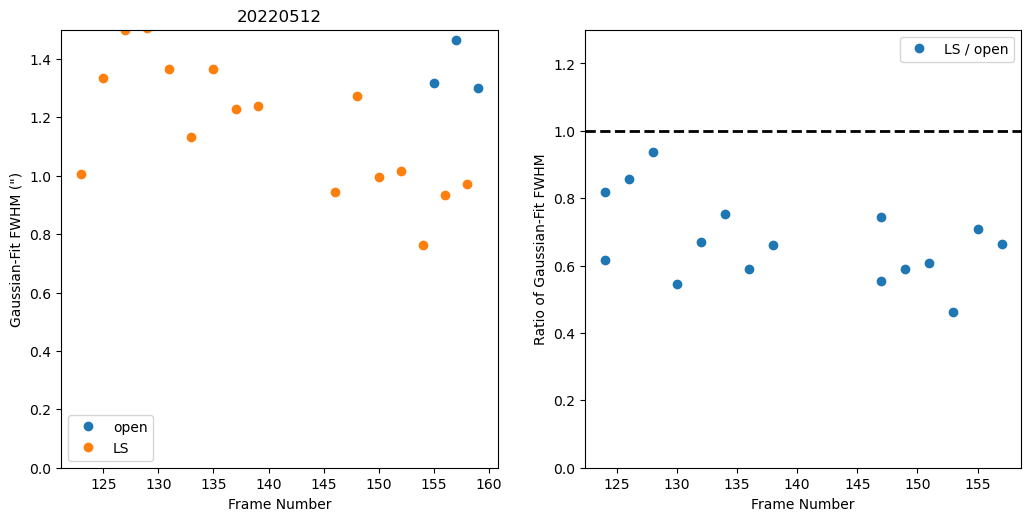

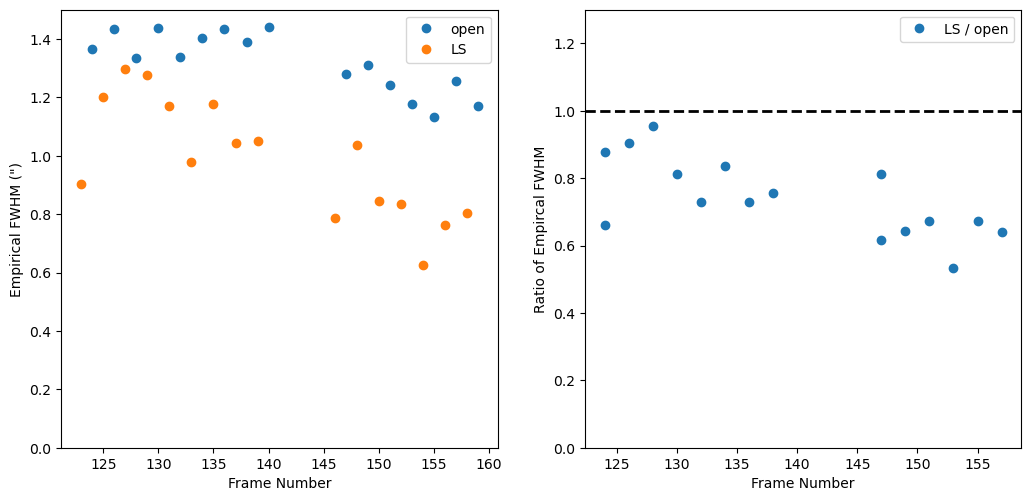

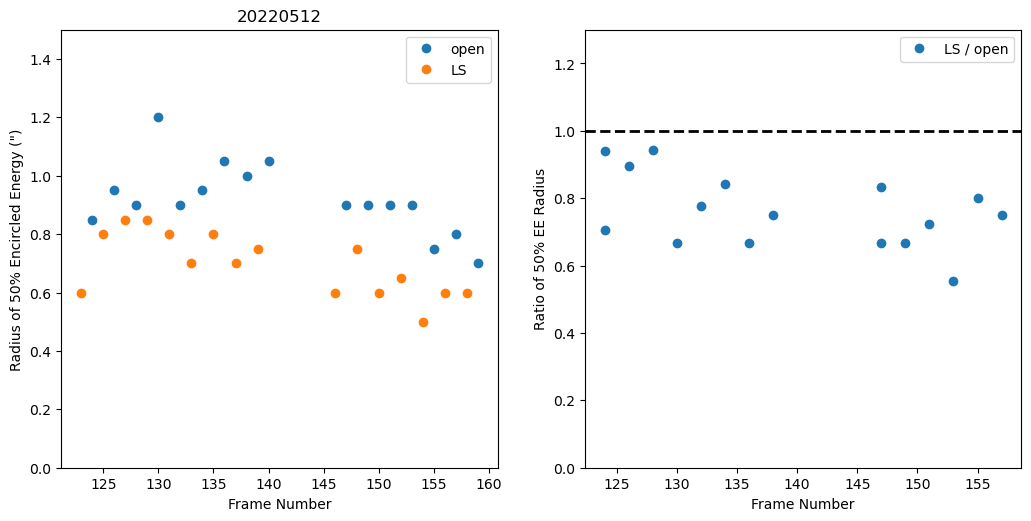

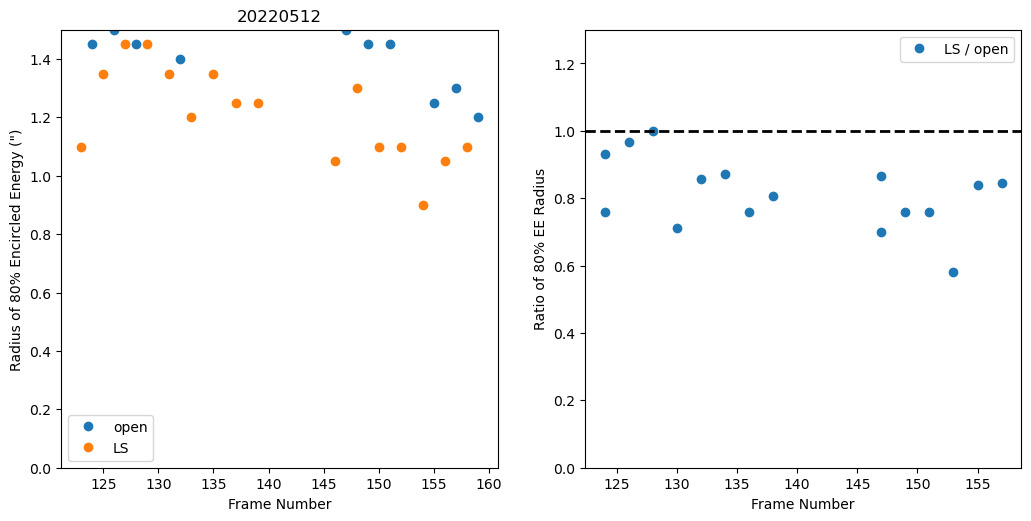

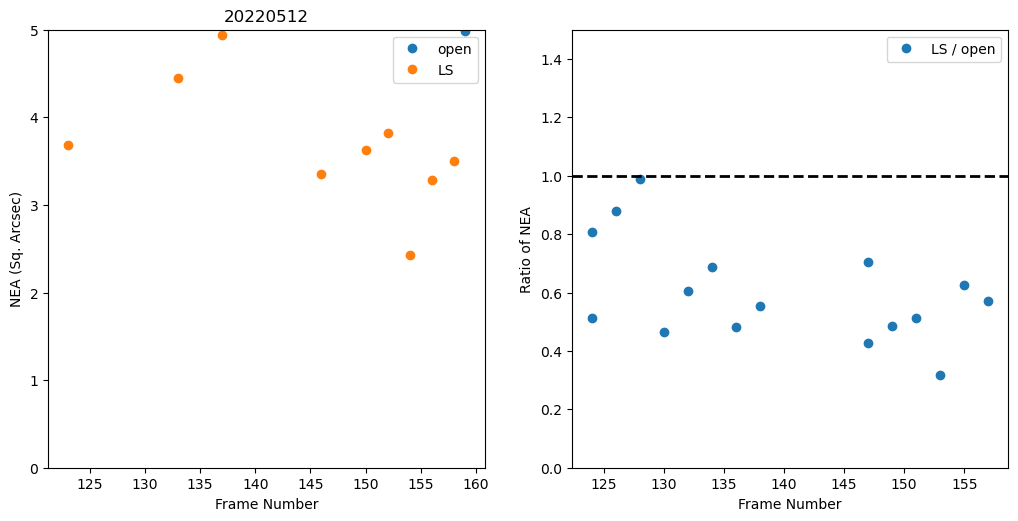

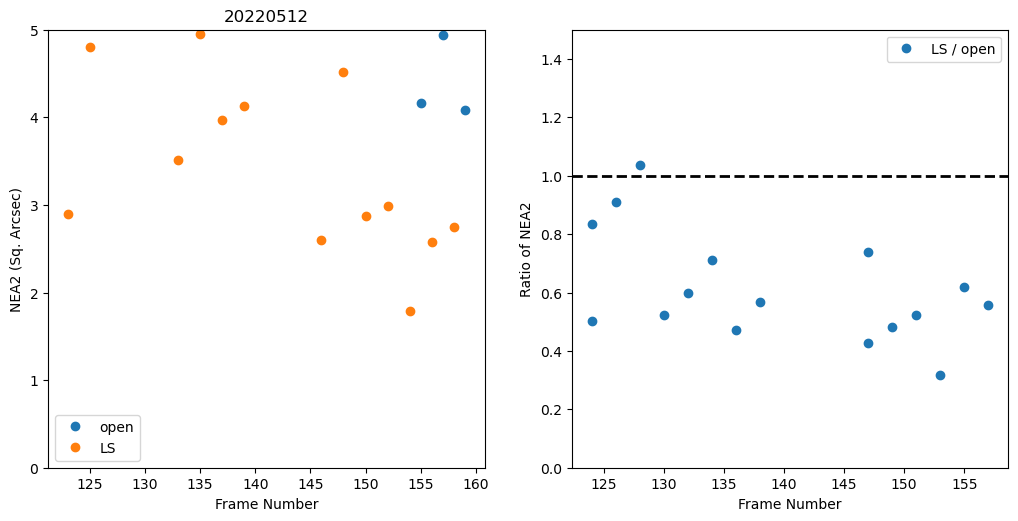

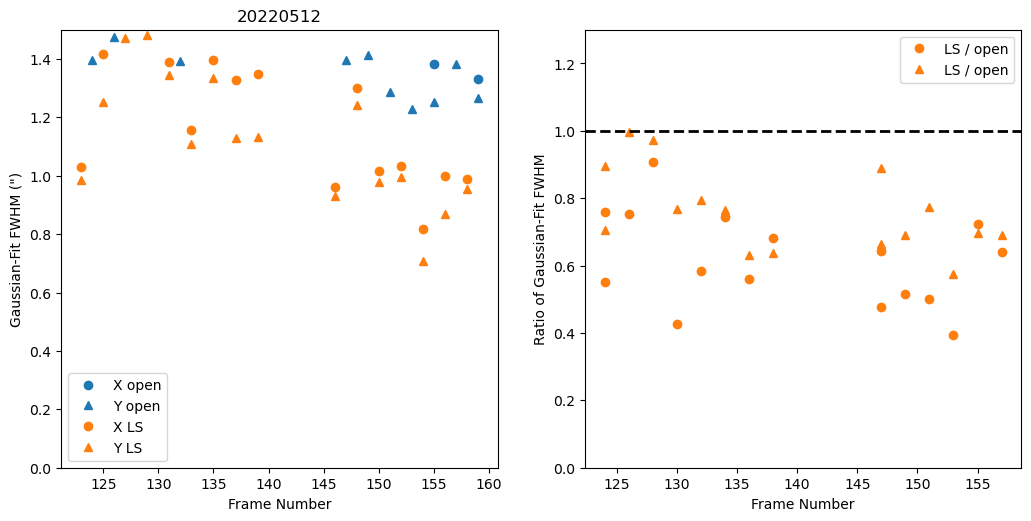

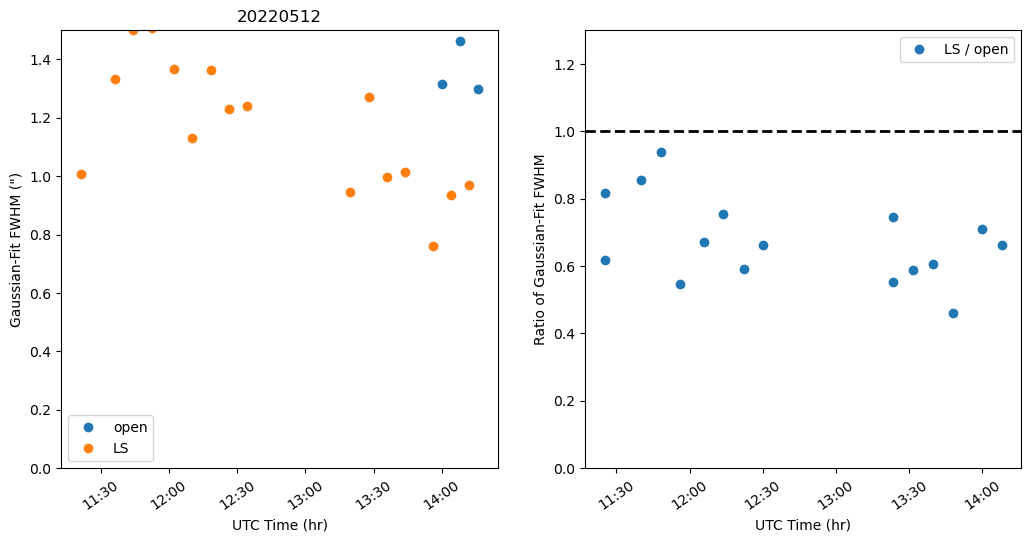

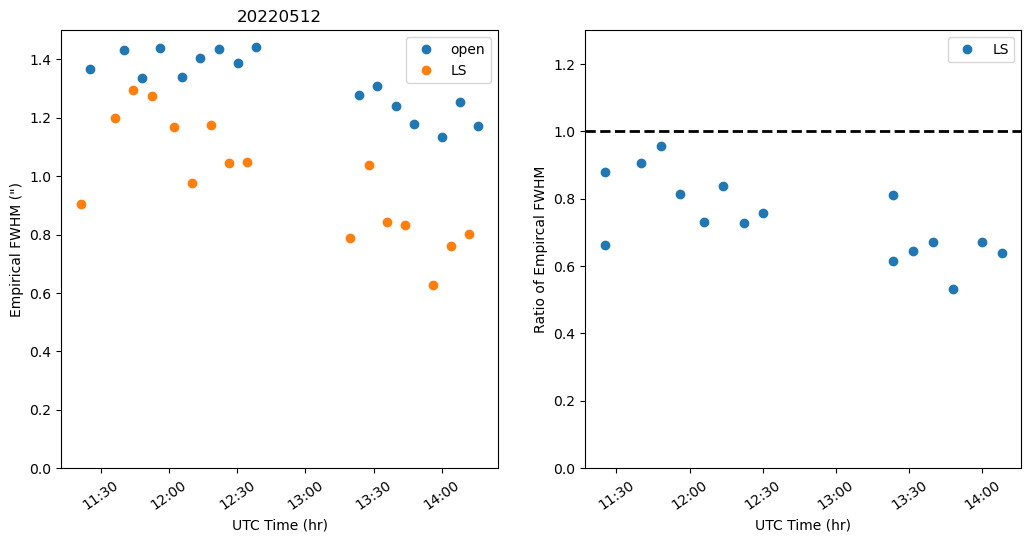

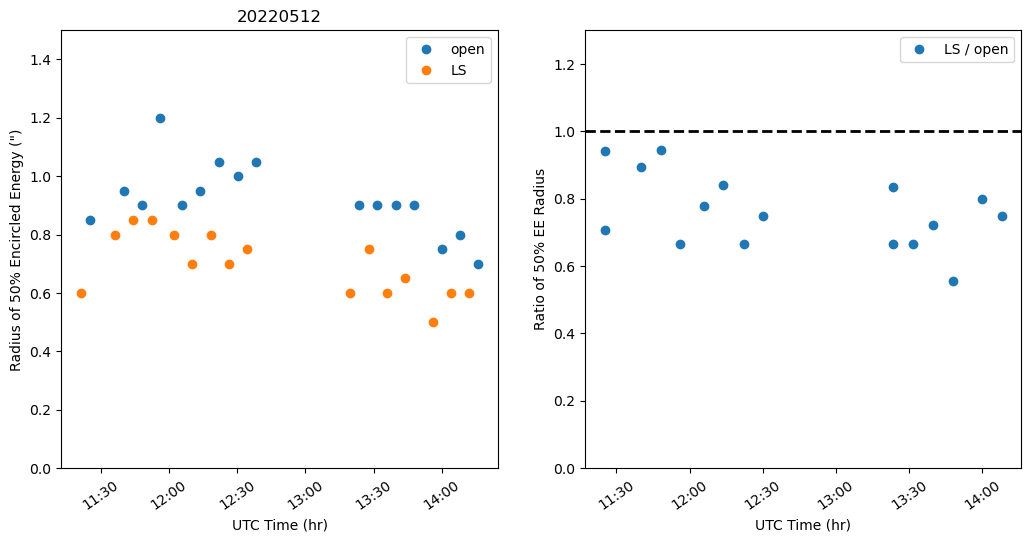

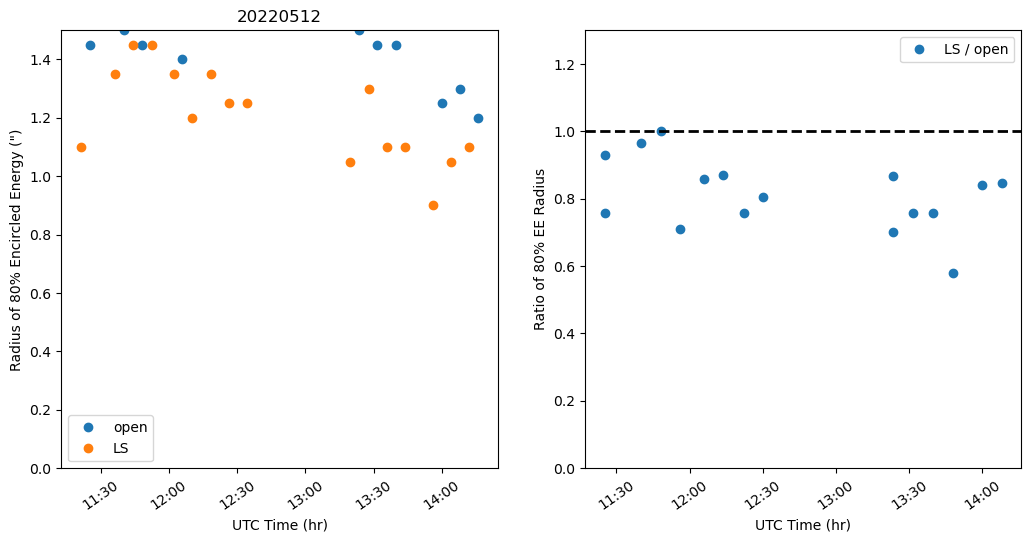

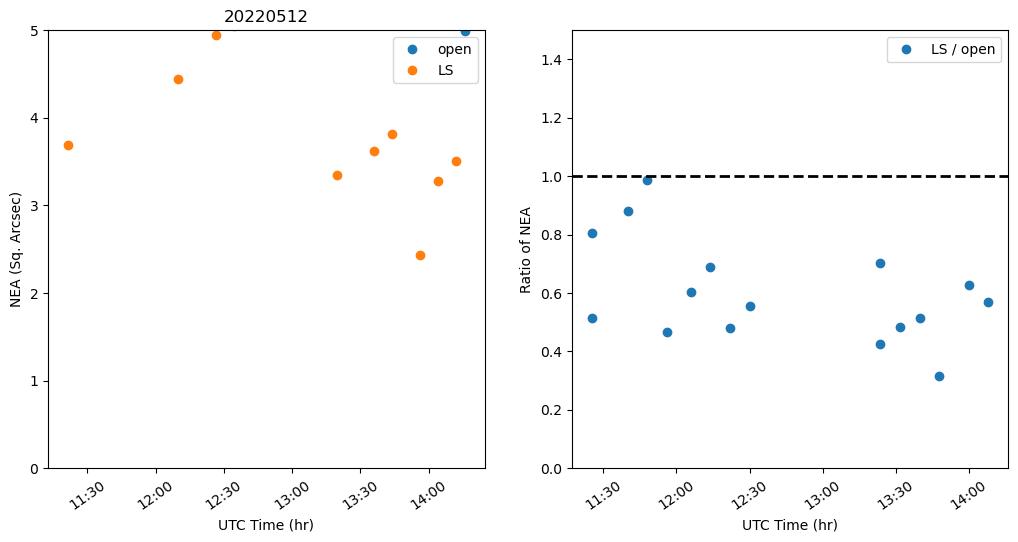

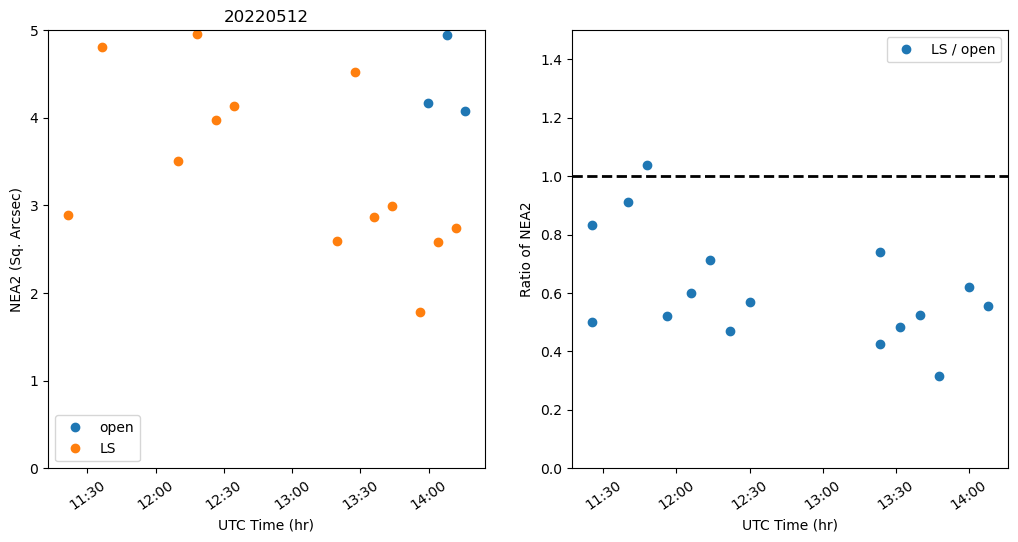

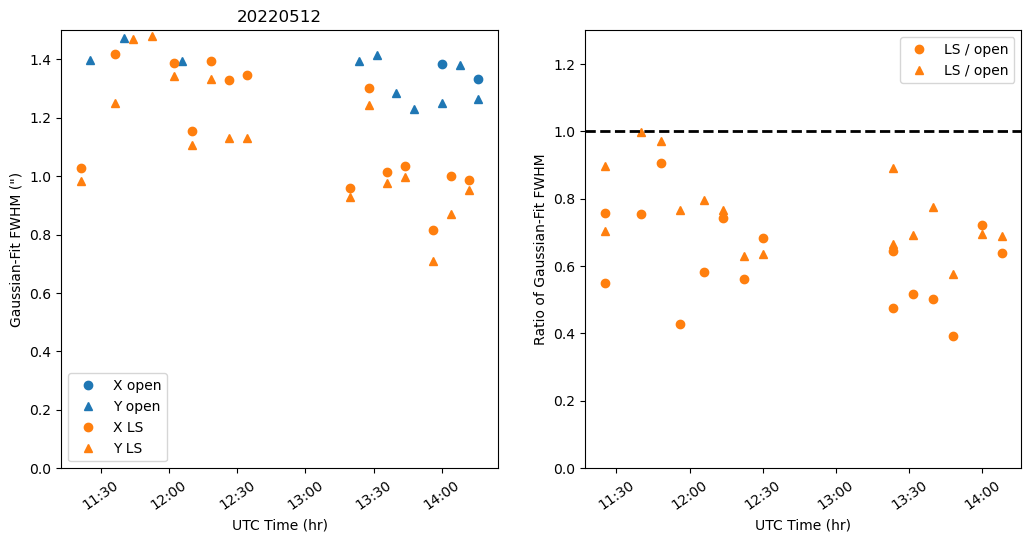

In [16]:
## Must have completed stats
suffixes = list(redu.dict_suffix.keys())
suffixes = ['open','LS']
plot_stats.plot_stack_stats(night, suffixes, root_dir=root_dir + '../../', reduce_dir='sta/reduce/')
plt.show()

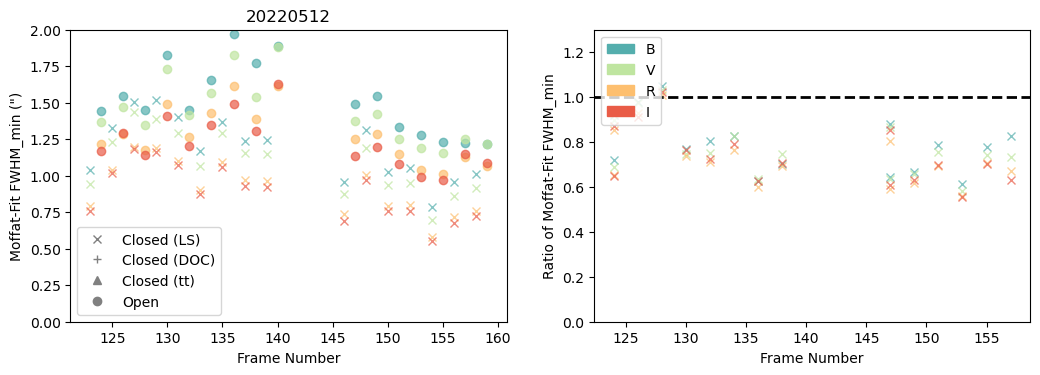

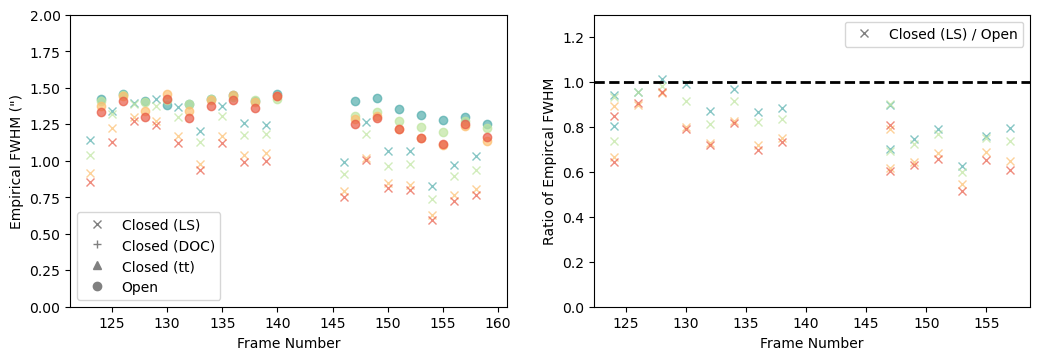

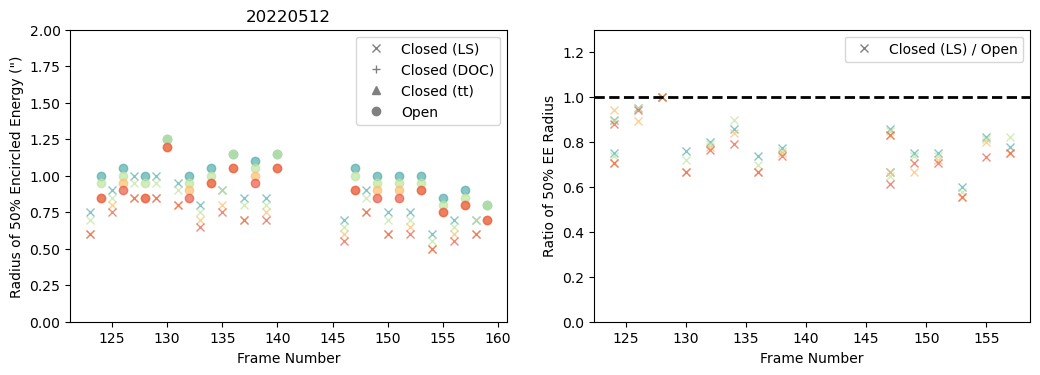

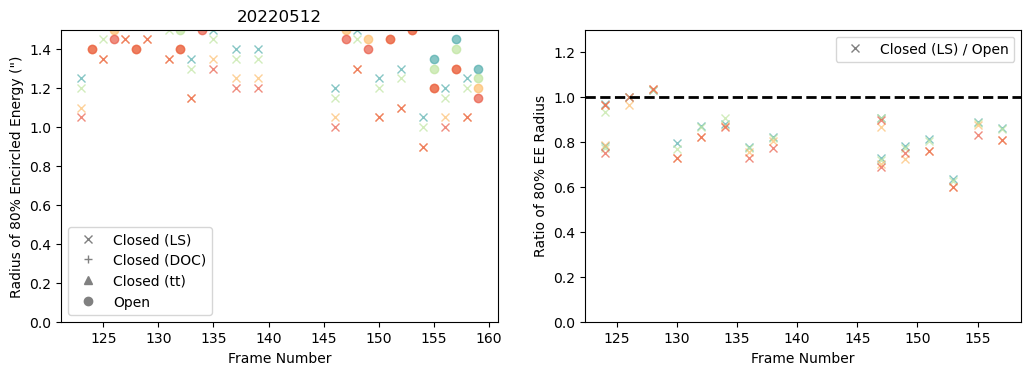

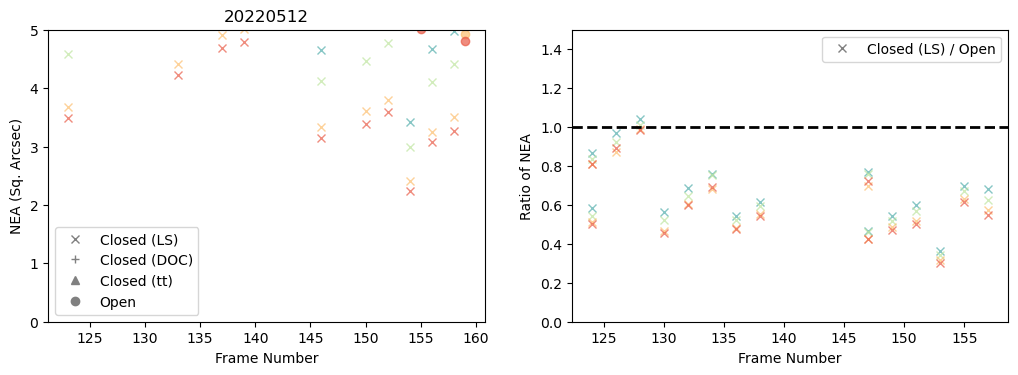

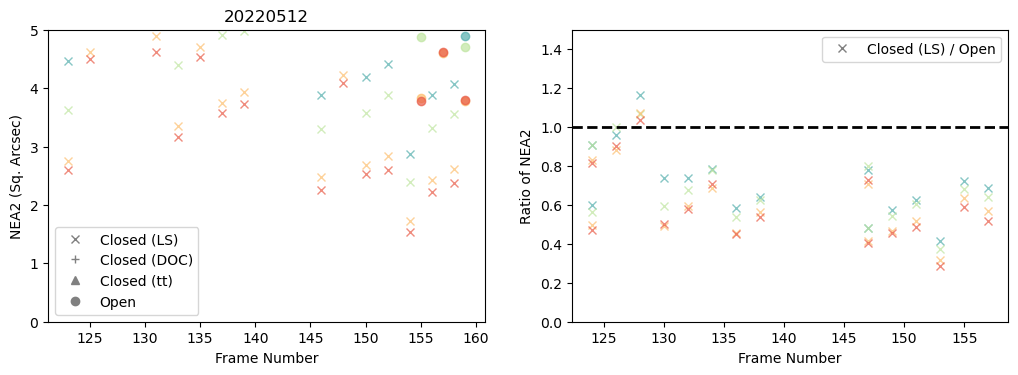

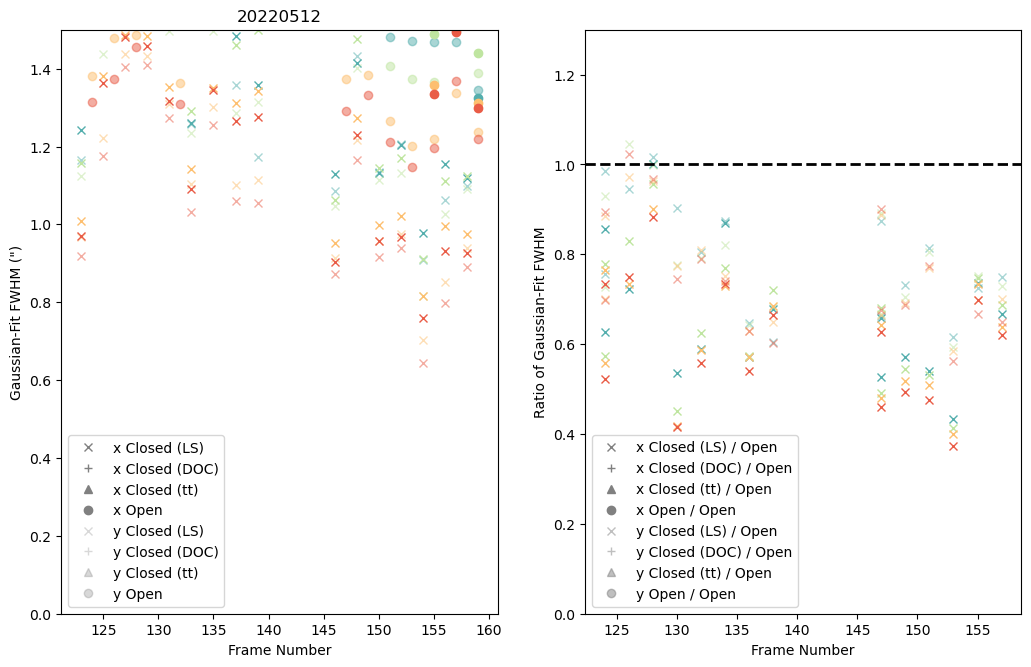

In [64]:
reload(plot_redu)
suffixes = ['_o', 'LS_c']
plot_redu.plot_stack_stats_4F_frame(night, suffixes, root_dir=root_dir + '../../', reduce_dir='sta/reduce/')
plt.show()

# 2. Aggregate Plots

## 2.1. Plot: Time Variation w/MASS-DIMM

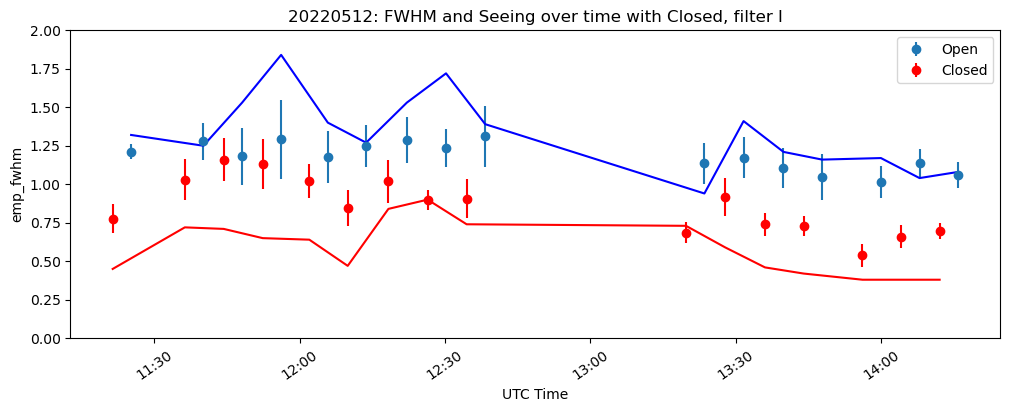

In [83]:
filt = "I"
wav = 806

open_file = f"{stats_dir}stats__o_{filt}_mdp.fits"
closed_file1 = f"{stats_dir}stats_LS_c_{filt}_mdp.fits"
plot_redu.plot_fwhmvt_nomatch_filt(open_file, closed_file1, 'emp_fwhm', f"{night}: FWHM and Seeing over time with Closed, filter {filt}", plots_dir, wav)

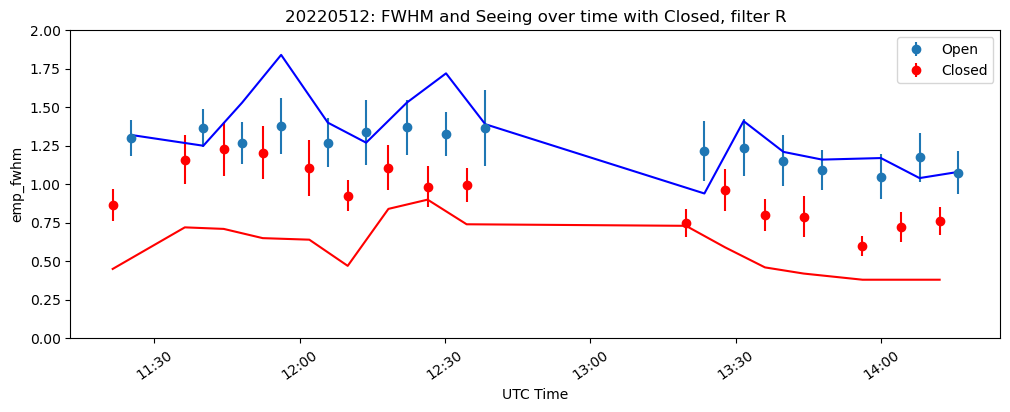

In [84]:
filt = "R"
wav = 658

open_file = f"{stats_dir}stats__o_{filt}_mdp.fits"
closed_file1 = f"{stats_dir}stats_LS_c_{filt}_mdp.fits"
plot_redu.plot_fwhmvt_nomatch_filt(open_file, closed_file1, 'emp_fwhm', f"{night}: FWHM and Seeing over time with Closed, filter {filt}", plots_dir, wav)

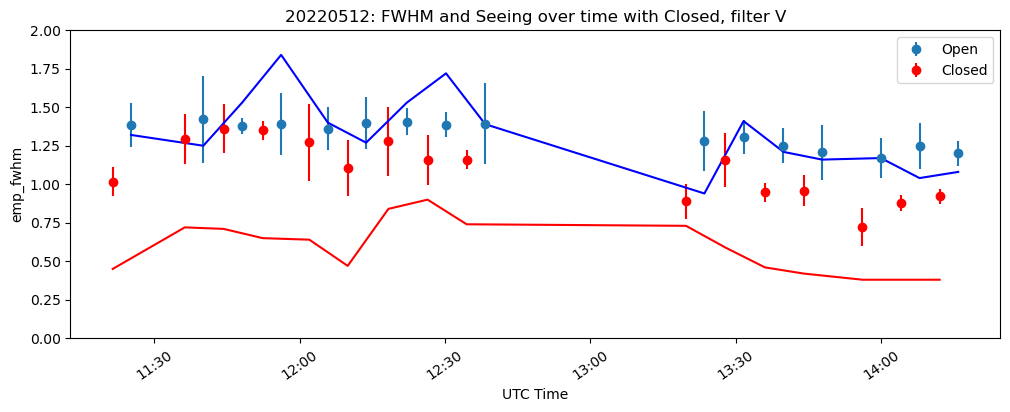

In [85]:
filt = "V"
wav = 551

open_file = f"{stats_dir}stats__o_{filt}_mdp.fits"
closed_file1 = f"{stats_dir}stats_LS_c_{filt}_mdp.fits"
plot_redu.plot_fwhmvt_nomatch_filt(open_file, closed_file1, 'emp_fwhm', f"{night}: FWHM and Seeing over time with Closed, filter {filt}", plots_dir, wav)

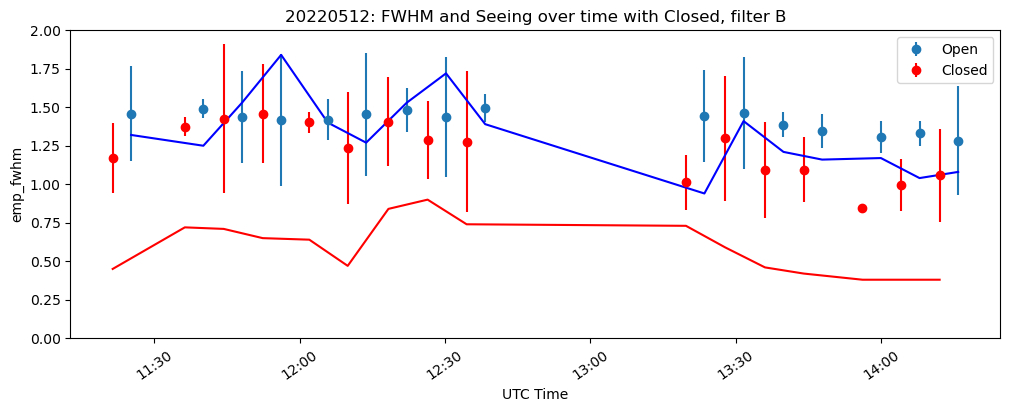

In [86]:
filt = "B"
wav = 445

open_file = f"{stats_dir}stats__o_{filt}_mdp.fits"
closed_file1 = f"{stats_dir}stats_LS_c_{filt}_mdp.fits"
plot_redu.plot_fwhmvt_nomatch_filt(open_file, closed_file1, 'emp_fwhm', f"{night}: FWHM and Seeing over time with Closed, filter {filt}", plots_dir, wav)

In [69]:
list(redu.dict_suffix.keys())

['open_BRIV', 'LS_BRIV', 'docz_BRIV', 'open_RIVB', 'LS_RIVB', 'docz_RIVB']

## 2.2. Plot: CDF of Moffat FWHM

This fuction takes in files, and for each, calculates a FWHM. The minor and major axises are then plotted.

Plate scale is not hard-coded or mentioned... not sure why this pixel scale is off yet [TODO]

In [98]:
data = Table.read(f"{stats_dir}stats_open_mdp.fits")
#Table.read(f"{stats_dir}stats__o_{f_band}_mdp.fits")
data

<Table masked=True length=16>
                                 Image                                   ...
                                bytes72                                  ...
------------------------------------------------------------------------ ...
/g/lu/data/imaka/onaga/20220512/sta/reduce/Fld2/sta124_o_scan_clean.fits ...
/g/lu/data/imaka/onaga/20220512/sta/reduce/Fld2/sta126_o_scan_clean.fits ...
/g/lu/data/imaka/onaga/20220512/sta/reduce/Fld2/sta128_o_scan_clean.fits ...
/g/lu/data/imaka/onaga/20220512/sta/reduce/Fld2/sta130_o_scan_clean.fits ...
/g/lu/data/imaka/onaga/20220512/sta/reduce/Fld2/sta132_o_scan_clean.fits ...
/g/lu/data/imaka/onaga/20220512/sta/reduce/Fld2/sta134_o_scan_clean.fits ...
/g/lu/data/imaka/onaga/20220512/sta/reduce/Fld2/sta136_o_scan_clean.fits ...
/g/lu/data/imaka/onaga/20220512/sta/reduce/Fld2/sta138_o_scan_clean.fits ...
/g/lu/data/imaka/onaga/20220512/sta/reduce/Fld2/sta140_o_scan_clean.fits ...
/g/lu/data/imaka/onaga/20220512/sta/reduce/Fld2/sta147_o_scan_clean.fits ...
/g/lu/data/imaka/onaga/20220512/sta/reduce/Fld2/sta149_o_scan_clean.fits ...
/g/lu/data/imaka/onaga/20220512/sta/reduce/Fld2/sta151_o_scan_clean.fits ...
/g/lu/data/imaka/onaga/20220512/sta/reduce/Fld2/sta153_o_scan_clean.fits ...
/g/lu/data/imaka/onaga/20220512/sta/reduce/Fld2/sta155_o_scan_clean.fits ...
/g/lu/data/imaka/onaga/20220512/sta/reduce/Fld2/sta157_o_scan_clean.fits ...
/g/lu/data/imaka/onaga/20220512/sta/reduce/Fld2/sta159_o_scan_clean.fits ...

/g/lu/data/imaka/onaga/20220512/sta/reduce/stats/stats__o_B.fits
/g/lu/data/imaka/onaga/20220512/sta/reduce/stats/stats_LS_c_B.fits


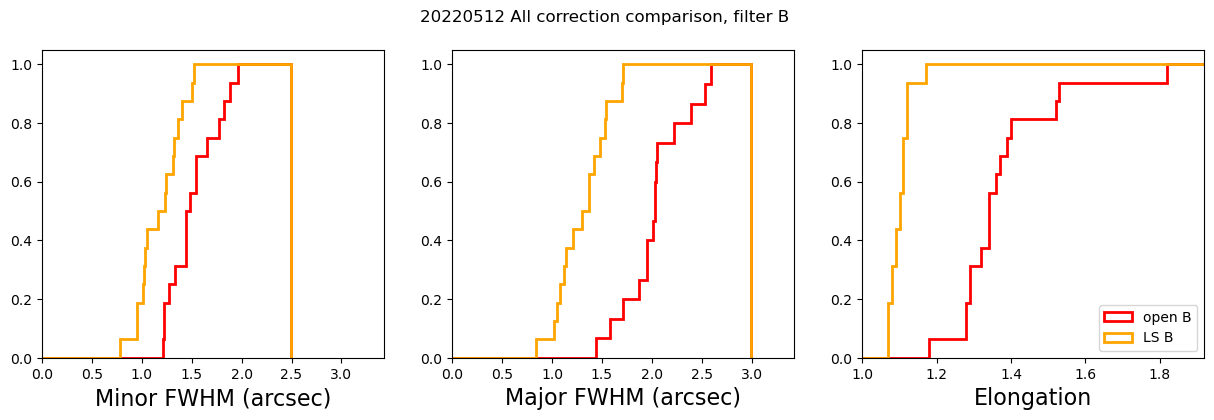

In [115]:
f_band = "B"

files = [f"{stats_dir}stats__o_{f_band}.fits", f"{stats_dir}stats_LS_c_{f_band}.fits"]
labels = ['open '+ f_band, 'LS ' + f_band]
colors = ['red', 'orange', 'green', 'blue', 'lightgreen', 'cyan']
plot_stats.comp_cdf(files, labels, colors)
plt.suptitle(f"{night} All correction comparison, filter {f_band}")
plt.show()

/g/lu/data/imaka/onaga/20220512/sta/reduce/stats/stats__o_B.fits
/g/lu/data/imaka/onaga/20220512/sta/reduce/stats/stats__o_V.fits
/g/lu/data/imaka/onaga/20220512/sta/reduce/stats/stats__o_R.fits
/g/lu/data/imaka/onaga/20220512/sta/reduce/stats/stats__o_I.fits


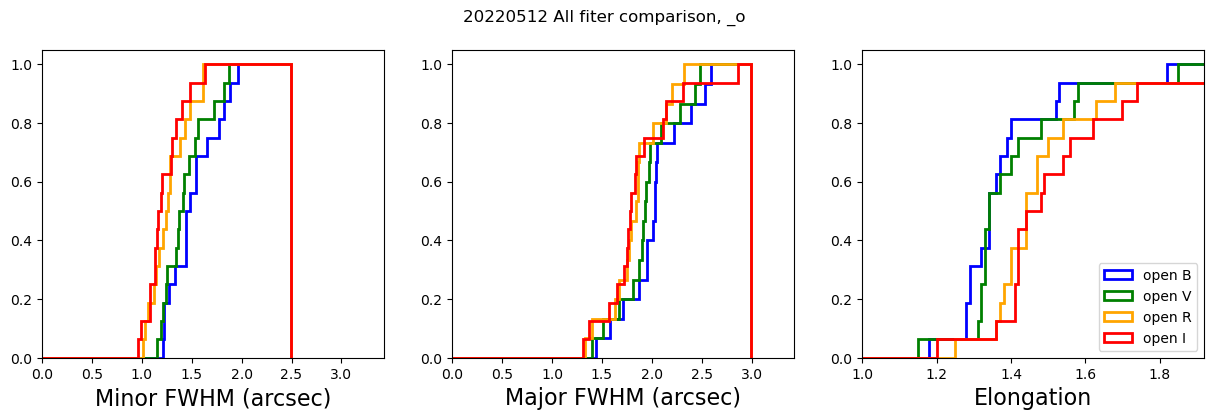

In [113]:
suff = "_o"

files = [f"{stats_dir}stats_{suff}_B.fits", f"{stats_dir}stats_{suff}_V.fits", f"{stats_dir}stats_{suff}_R.fits",f"{stats_dir}stats_{suff}_I.fits"]
labels = ['open B', 'open V', 'open R', 'open I']
colors = ['blue', 'green', 'orange', 'red']
plot_stats.comp_cdf(files, labels, colors)
plt.suptitle(f"{night} All fiter comparison, {suff}")
plt.show()

/g/lu/data/imaka/onaga/20220512/sta/reduce/stats/stats_LS_c_B.fits
/g/lu/data/imaka/onaga/20220512/sta/reduce/stats/stats_LS_c_V.fits
/g/lu/data/imaka/onaga/20220512/sta/reduce/stats/stats_LS_c_R.fits
/g/lu/data/imaka/onaga/20220512/sta/reduce/stats/stats_LS_c_I.fits


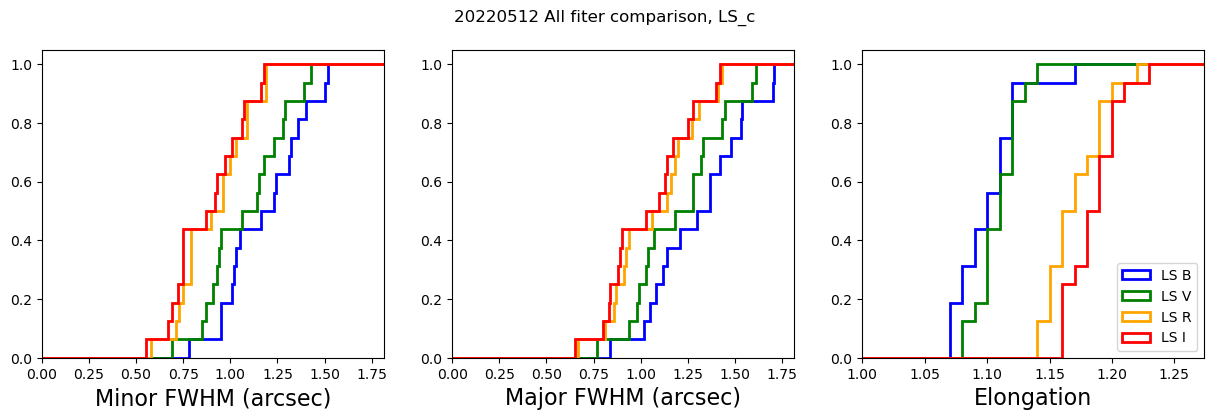

In [114]:
suff = "LS_c"

files = [f"{stats_dir}stats_{suff}_B.fits", f"{stats_dir}stats_{suff}_V.fits", f"{stats_dir}stats_{suff}_R.fits",f"{stats_dir}stats_{suff}_I.fits"]
labels = ['LS B', 'LS V', 'LS R', 'LS I']
colors = ['blue', 'green', 'orange', 'red']
plot_stats.comp_cdf(files, labels, colors)
plt.suptitle(f"{night} All fiter comparison, {suff}")
plt.show()

# 3. Four Filter Analysis Plots

In [116]:
from imaka.analysis import fourfilt
root = stats_dir

files_c = [root+"stats_LS_c_B.fits", root+"stats_LS_c_V.fits", root+"stats_LS_c_R.fits", root+"stats_LS_c_I.fits"]
files_o = [root+"stats__o_B.fits", root+"stats__o_V.fits", root+"stats__o_R.fits", root+"stats__o_I.fits"]
wav = [445, 551, 658, 806]
fourfilt.stack_all(table_list, open_close_list, filter_list)
# not 100% sure how to use this one...

NameError: name 'table_list' is not defined

## 3.1. Plot: 4F Correction Factor

Near-simeltaneous AO-off and AO-on data in each filter shows the variation in amount of correction with changing wavelength. 

What is plotted? Median FWHM \* ps for the listed files. Done for moffat FWHM. The original Function in fourfilt.py seems to be recomputing the moffat FWHM...
- Left: Performance for AO-off (blue) and AO-on (red), showing minor FWHM (circles) and major FWHM (squares) at each observation band.
- Right: Ratio of AO-off to AO-on FWHM for each filter, shown both for minor (circles) and major (squares) axes.

Plate scale (ps) was originally hard coded to 0.12





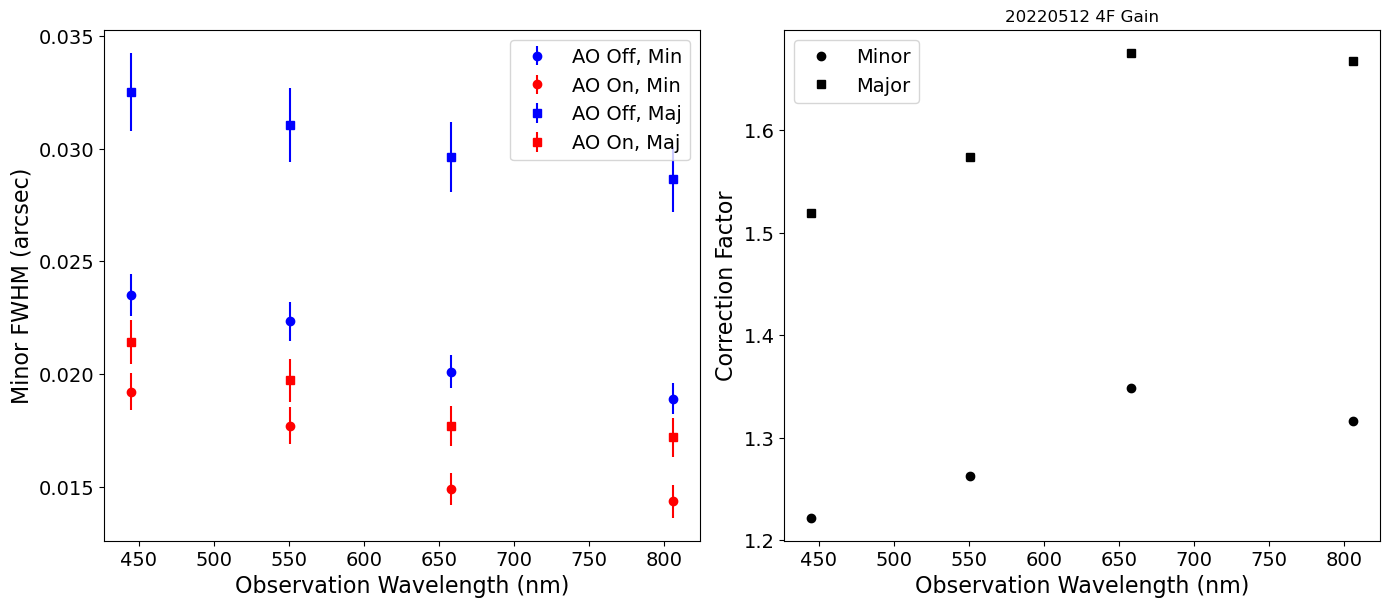

In [117]:
reload(fourfilt)
fourfilt.plot_gain(files_o, files_c, ps = 0.063) 
plt.title(f"{night} 4F Gain")
plt.show()

## 3.2. Plot: 4F Dependence Model
(Copied from four filter Analysis.ipynb)

GLAO correction is expected to be a function of wavelength. The figure below shows median minor FWHM at variuos wavelengths for AO-off (blue) and AO-on (red) data.  The data have been fit to a power-law model of the form: $f(x)=A(\frac{x}{x_o})^{-\alpha}$

With $A$, $x_o$, and $\alpha$ as free parameters

Each data set is shown in circle points with errorbars, with the best fit model (weighted with uncertainties) in solid lines. The corresponding $\alpha$ and $\chi^2$ are shown in the same color as the matching data set. In this case, the chi squared is the same as the reduced chi squared (4 data points - 3 free parameters = 1 degree of freedom).


χ$^2$=0.56
χ$^2$=1.65
α=0.39
α=0.54


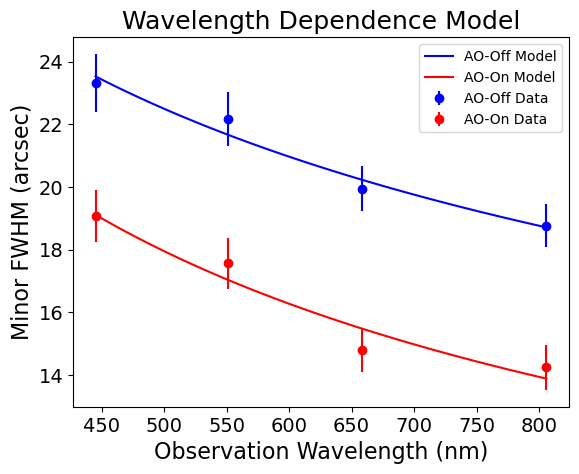

In [118]:
reload(fourfilt)
fourfilt.power_model(files_o, files_c, ps=1.0)

In [ ]:
# alpha and beta as a function of wavelength

# Field Variability

In [19]:
from importlib import reload
reload(plot_stats)

<module 'imaka.analysis.plot_stats' from '/u/eden/code/imaka/imaka/analysis/plot_stats.py'>

### Closed loop, single exposure

sta133LS_c_scan
Median FWHM           = 0.904"
Median FWHM (clipped) = 0.904"
Mean FWHM             = 1.390"
Mean FWHM (clipped)   = 0.931"
Stddev FWHM           = 14.576"
Stddev FWHM (clipped) = 0.088"


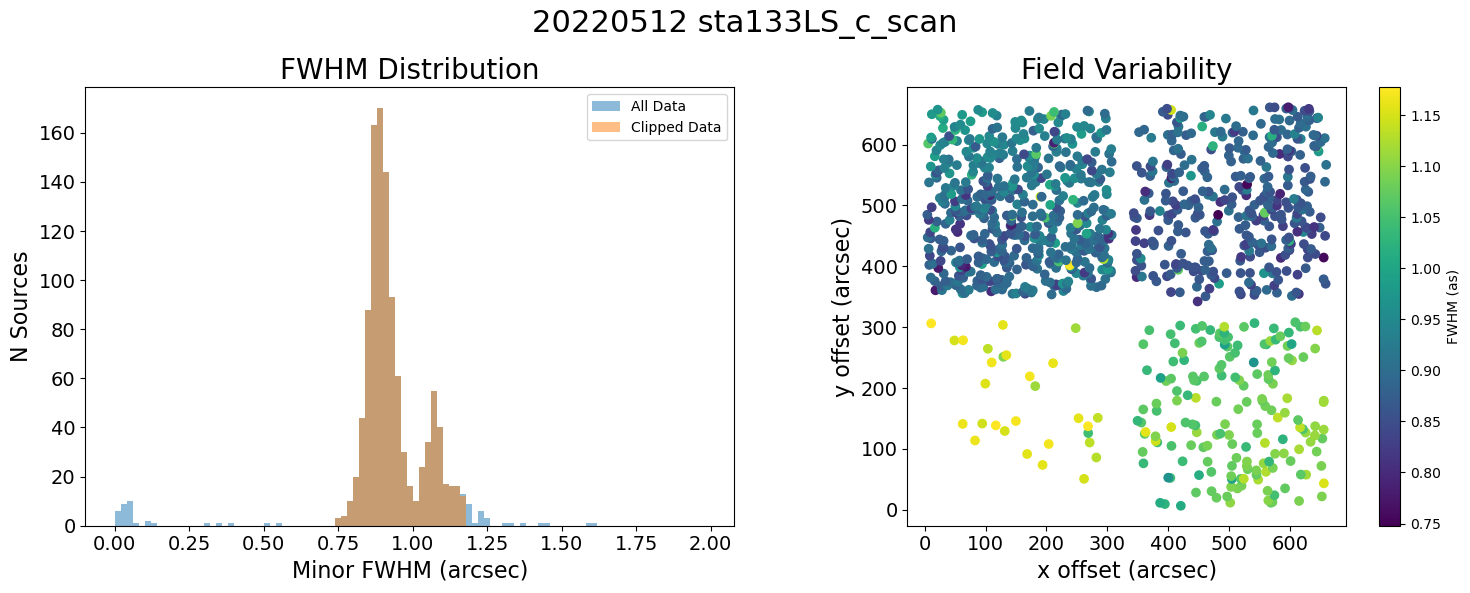

In [57]:
test_img_base = "sta133LS_c_scan"
print(test_img_base)
img_file = root_dir + 'reduce/Fld2/' + test_img_base + '_clean.fits'
starlist = root_dir + 'reduce/Fld2/' + test_img_base + '_clean_stars_stats_mdp.fits'
plot_stats.plot_var(img_file, starlist, night +" "+ test_img_base )

sta147_o_scan
Median FWHM           = 1.236"
Median FWHM (clipped) = 1.228"
Mean FWHM             = 1.580"
Mean FWHM (clipped)   = 1.250"
Stddev FWHM           = 3.294"
Stddev FWHM (clipped) = 0.124"


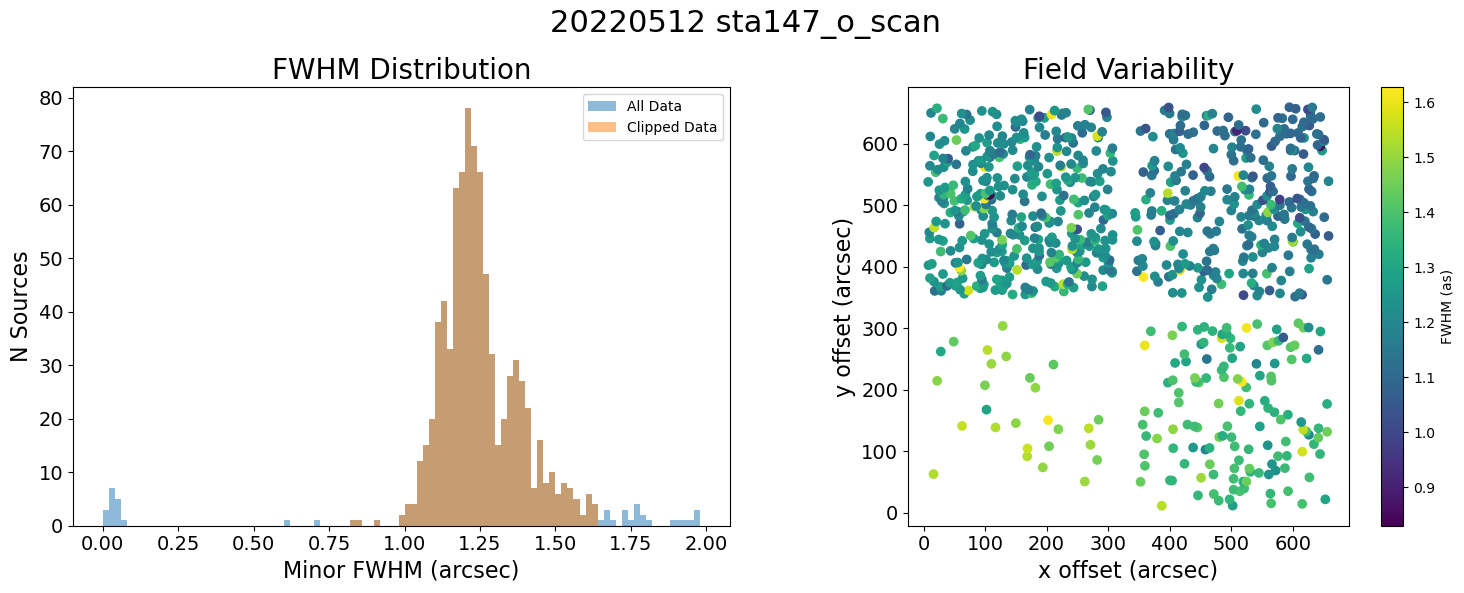

In [61]:
test_img_base = "sta147_o_scan"
print(test_img_base)
img_file = root_dir + 'reduce/Fld2/' + test_img_base + '_clean.fits'
starlist = root_dir + 'reduce/Fld2/' + test_img_base + '_clean_stars_stats_mdp.fits'
plot_stats.plot_var(img_file, starlist, night +" "+ test_img_base)

### Open Loop

Median FWHM           = 1.242"
Median FWHM (clipped) = 1.230"
Mean FWHM             = 2.255"
Mean FWHM (clipped)   = 1.269"
Stddev FWHM           = 11.275"
Stddev FWHM (clipped) = 0.155"


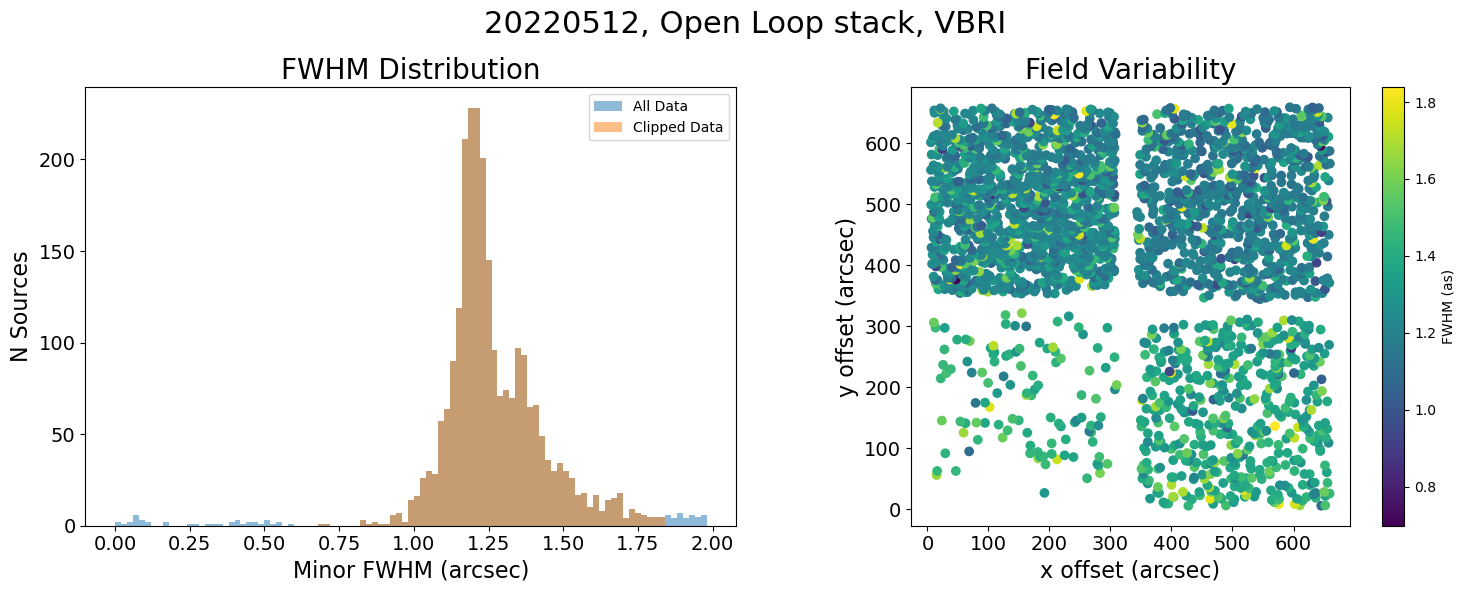

In [58]:
filt = 'VBRI'
img_file = stack_dir + f'fld2_stack__o_{filt}.fits' 
starlist = stack_dir + f'fld2_stack__o_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Open Loop stack, {filt}")

### Closed (LS)

Median FWHM           = 0.840"
Median FWHM (clipped) = 0.839"
Mean FWHM             = 1.211"
Mean FWHM (clipped)   = 0.866"
Stddev FWHM           = 5.750"
Stddev FWHM (clipped) = 0.122"


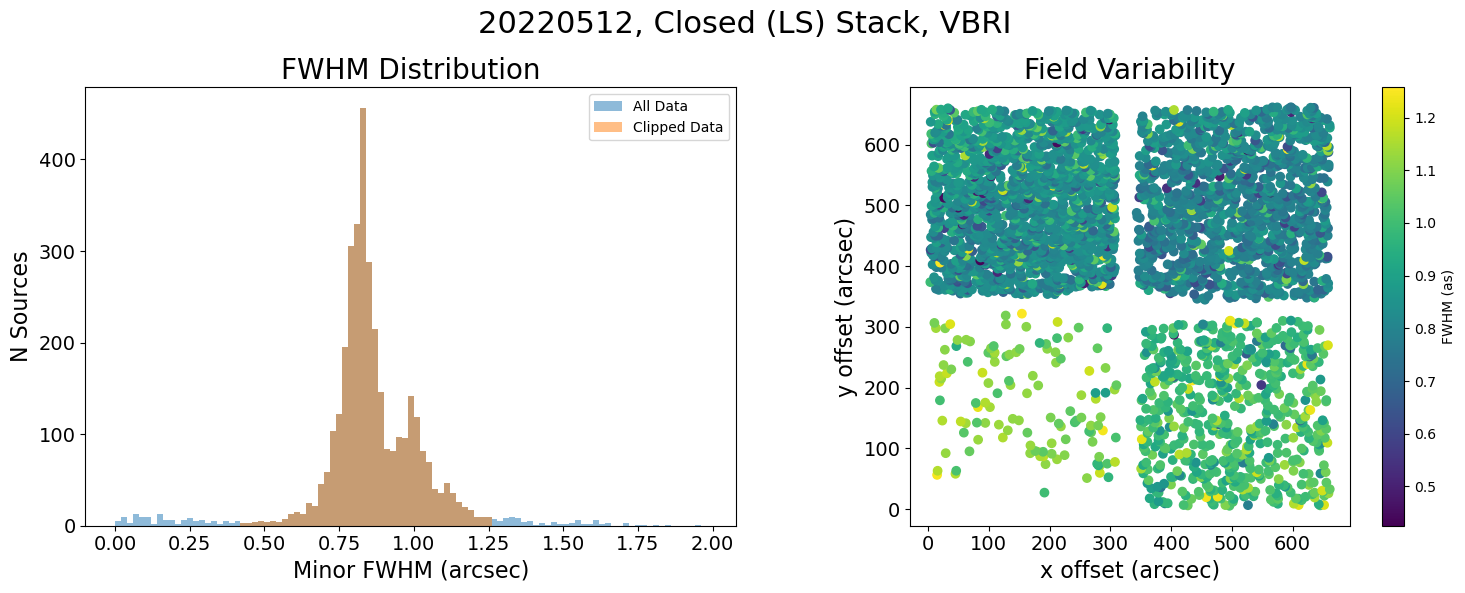

In [60]:
filt = 'VBRI'
img_file = stack_dir + f'fld2_stack_LS_c_{filt}.fits' 
starlist = stack_dir + f'fld2_stack_LS_c_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Closed (LS) Stack, {filt}")

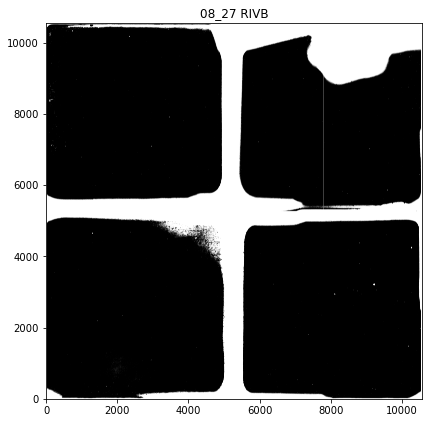

In [16]:
## What masks are we using? how are they different between orientations?
mask_dir = root_dir + "reduce/calib/"

hdul = fits.open(mask_dir +  "mask_RIVB.fits")

data = hdul[0].data

fig = plt.figure(figsize=(6,6))
plt.title("08_27 RIVB")
im = plt.imshow(data, origin ='lower', cmap='gray')
plt.tight_layout()
plt.show()
hdul.close()

In [41]:
stats_file = '/g/lu/data/imaka/onaga/20220512/sta/reduce/stats/stats__o_V.fits'

In [47]:
stats_file_root, stats_file_ext = os.path.splitext(stats_file)
output_stats = stats_file_root+ "_mdp"+ stats_file_ext
print(f' => fit_moffat finished, saving to {output_stats}')

 => fit_moffat finished, saving to /g/lu/data/imaka/onaga/20220512/sta/reduce/stats/stats__o_V_mdp.fits


In [43]:
import os

In [45]:
stats_file_root

'/g/lu/data/imaka/onaga/20220512/sta/reduce/stats/stats__o_V'

In [46]:
stats_file_root.split("_mdp")[0]

'/g/lu/data/imaka/onaga/20220512/sta/reduce/stats/stats__o_V'

In [55]:
key = "LS_c"
fil_band = "B"

stat_f = f'{redu.root_dir}reduce/stats/stats_{key}_{fil_band}_mdp.fits'
stats = Table.read(stat_f)

In [56]:
stats

<Table masked=True length=16>
                                  Image                                    ...
                                 bytes74                                   ...
-------------------------------------------------------------------------- ...
/g/lu/data/imaka/onaga/20220512/sta/reduce/Fld2/sta123LS_c_scan_clean.fits ...
/g/lu/data/imaka/onaga/20220512/sta/reduce/Fld2/sta125LS_c_scan_clean.fits ...
/g/lu/data/imaka/onaga/20220512/sta/reduce/Fld2/sta127LS_c_scan_clean.fits ...
/g/lu/data/imaka/onaga/20220512/sta/reduce/Fld2/sta129LS_c_scan_clean.fits ...
/g/lu/data/imaka/onaga/20220512/sta/reduce/Fld2/sta131LS_c_scan_clean.fits ...
/g/lu/data/imaka/onaga/20220512/sta/reduce/Fld2/sta133LS_c_scan_clean.fits ...
/g/lu/data/imaka/onaga/20220512/sta/reduce/Fld2/sta135LS_c_scan_clean.fits ...
/g/lu/data/imaka/onaga/20220512/sta/reduce/Fld2/sta137LS_c_scan_clean.fits ...
/g/lu/data/imaka/onaga/20220512/sta/reduce/Fld2/sta139LS_c_scan_clean.fits ...
/g/lu/data/imaka/onaga/20220512/sta/reduce/Fld2/sta146LS_c_scan_clean.fits ...
/g/lu/data/imaka/onaga/20220512/sta/reduce/Fld2/sta148LS_c_scan_clean.fits ...
/g/lu/data/imaka/onaga/20220512/sta/reduce/Fld2/sta150LS_c_scan_clean.fits ...
/g/lu/data/imaka/onaga/20220512/sta/reduce/Fld2/sta152LS_c_scan_clean.fits ...
/g/lu/data/imaka/onaga/20220512/sta/reduce/Fld2/sta154LS_c_scan_clean.fits ...
/g/lu/data/imaka/onaga/20220512/sta/reduce/Fld2/sta156LS_c_scan_clean.fits ...
/g/lu/data/imaka/onaga/20220512/sta/reduce/Fld2/sta158LS_c_scan_clean.fits ...